# Pymaceuticals Inc. Study Analysis

## Observations
- Both the Ramicane and Capomulin treatments appear to decrease the size of the tumor relative to the other treatments.
- The regression analysis shows there is a strong correlation between the weight of mice and the size of their tumors.
- The bar charts show there was care taken in getting a relatively similar number of time points for each treatment regimen, and the pie charts show that the sex of the studied mice was kept very equal. This meticulousness across multiple variables enhances the credibility of the study's results.

In [64]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Read in csv files
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

# merge csv files
study_data_merged = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# preview data
study_data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
# Display the number of unique mice IDs in the data
len(study_data_merged["Mouse ID"].unique())

249

In [66]:
# Check for any mouse ID with duplicate time points
# Display the data associated with that mouse ID
find_duplicated_time_points = study_data_merged.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_mice = study_data_merged.loc[find_duplicated_time_points,'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [67]:
# Create a new DataFrame where the redundant mouse IDs are dropped
clean_study_data = study_data_merged[study_data_merged['Mouse ID'].isin(duplicated_mice)==False]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [68]:
# Display the updated number of unique mice IDs in the data
len(clean_study_data["Mouse ID"].unique())

248

## Summary Stats

- Generate summary table including:
- mean, median, variance, standard deviation, 
- and SEM of the tumor volume for each regimen

In [69]:
#calculate summary statistics
means = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdevs = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


#build summary table
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stdevs,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

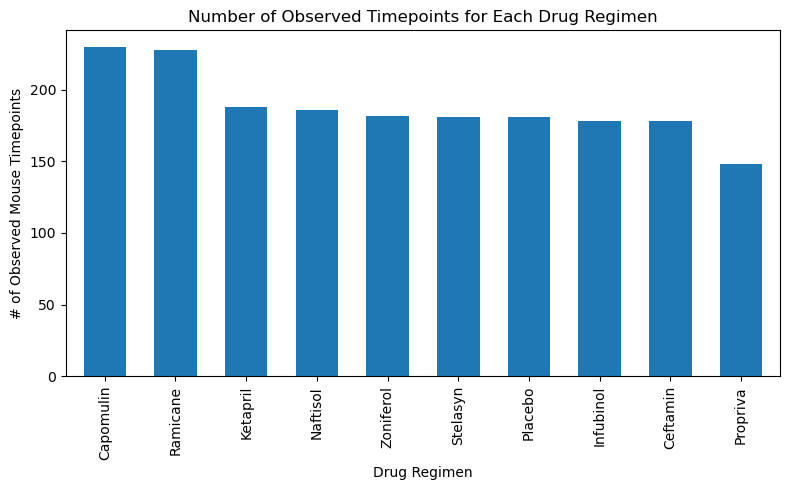

In [70]:
#count number of mice per drug regimen
from turtle import width


timepoint_counts = clean_study_data['Drug Regimen'].value_counts()

# Generate a bar plot showing the total number time points for each drug regimen using pandas
timepoint_counts.plot(kind='bar', figsize=(8,5), width=0.6)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Timepoints for Each Drug Regimen")
plt.tight_layout()
plt.show()

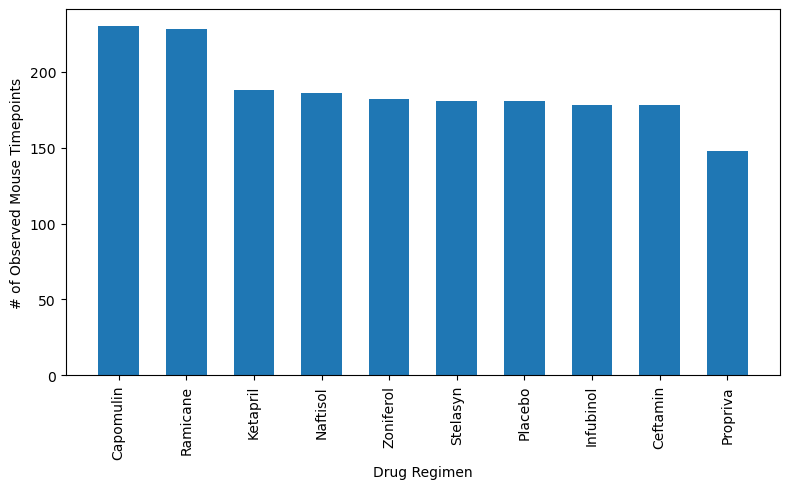

In [71]:
# Generate a bar plot showing the total number time points for each drug regimen using matplotlib.
plt.figure(figsize=(8,5))
plt.bar(timepoint_counts.index, height=timepoint_counts.values.tolist() , width=0.6)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

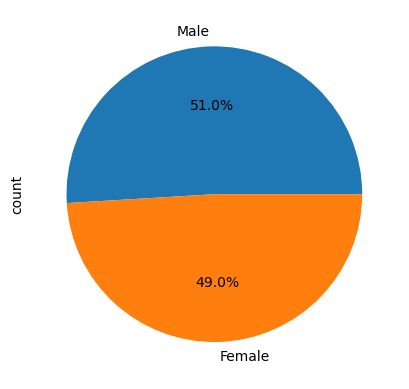

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
timepoint_counts = clean_study_data.Sex.value_counts()
timepoint_counts.plot(kind="pie",autopct='%.1f%%')
plt.show()

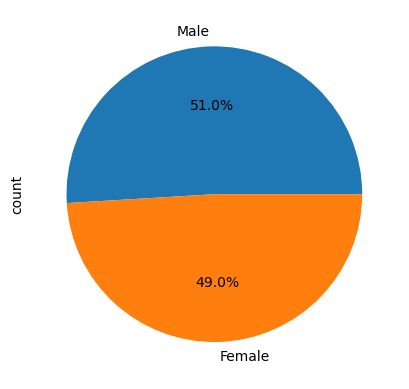

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib
plt.pie(timepoint_counts, labels=timepoint_counts.index.tolist(), autopct='%.1f%%')
plt.ylabel('count')
plt.show()


## Quartiles, Outliers and Boxplots
- Calculate the final tumor volume of each mouse across four of the treatment regimens:
- Capomulin, Ramicane, Infubinol, and Ceftamin

In [74]:
#group by max timepoint for each mouse
final_tumor_vol = clean_study_data.groupby(["Mouse ID"])['Timepoint'].max()

#reset index
final_tumor_vol = final_tumor_vol.reset_index()

# DataFrame that shows largest tumor vol for each mouse. 
# Merged with the original cleaned DataFrame.
data_with_tumor_results = final_tumor_vol.merge(clean_study_data, on=['Mouse ID','Timepoint'], how="left")
data_with_tumor_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            248 non-null    object 
 1   Timepoint           248 non-null    int64  
 2   Tumor Volume (mm3)  248 non-null    float64
 3   Metastatic Sites    248 non-null    int64  
 4   Drug Regimen        248 non-null    object 
 5   Sex                 248 non-null    object 
 6   Age_months          248 non-null    int64  
 7   Weight (g)          248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.6+ KB


In [75]:
# build treatment list
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# list to hold final tumor vol data
tumor_vol_list = []

# Calculate the IQR and find any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_size = data_with_tumor_results.loc[data_with_tumor_results["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # append tumor vol data to list    
    tumor_vol_list.append(tumor_size)
    
    # Find any outliers using upper and lower bounds
    quartiles = tumor_size.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    medianq = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_size.loc[(tumor_size < lower_bound) | (tumor_size > upper_bound)]
    
    # display the quartiles and outliers
    print(f"{drug}'s quartiles and potential outliers are:")
    print(f"lower: {lowerq:.2f}")
    print(f"median: {medianq:.2f}")
    print(f"upper: {upperq:.2f}")
    print(f"potential outliers: {outliers.values}")
    print("-"*30)
    

Capomulin's quartiles and potential outliers are:
lower: 32.38
median: 38.13
upper: 40.16
potential outliers: []
------------------------------
Ramicane's quartiles and potential outliers are:
lower: 31.56
median: 36.56
upper: 40.66
potential outliers: []
------------------------------
Infubinol's quartiles and potential outliers are:
lower: 54.05
median: 60.17
upper: 65.53
potential outliers: [36.3213458]
------------------------------
Ceftamin's quartiles and potential outliers are:
lower: 48.72
median: 59.85
upper: 64.30
potential outliers: []
------------------------------


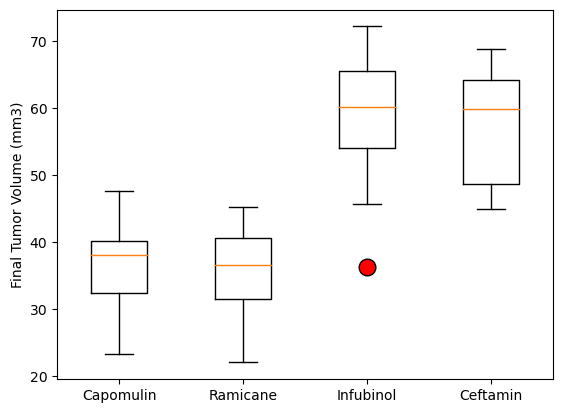

In [76]:
# Box plot that shows the distrubution of the tumor volume for each treatment group.
mark_outlier_red = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=mark_outlier_red)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

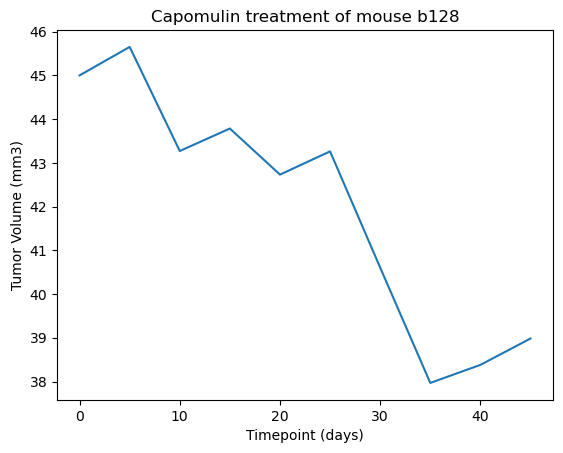

In [80]:
# Generate a line plot of tumor volume vs. time point for mouse b128
capomulin_table = clean_study_data.loc[clean_study_data['Drug Regimen'] == "Capomulin"]
b128_mouse_data = capomulin_table.loc[capomulin_table['Mouse ID']== 'b128']
plt.plot(b128_mouse_data['Timepoint'],b128_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.show()

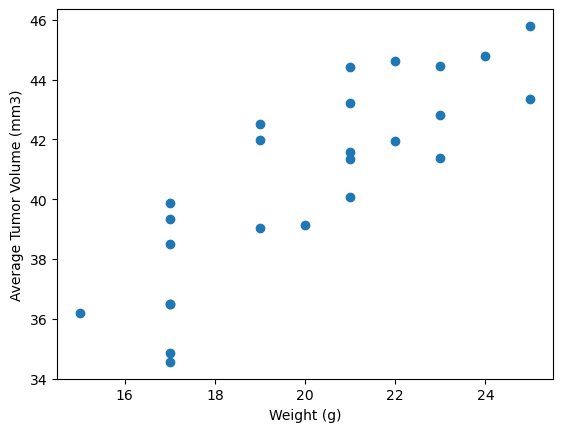

In [81]:
# Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin Treatment regimen
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression
Calculate the correlation coefficient and linear regression
model between mouse weight and average observed tumor volume 
for the entire Capomulin treatment regimen.

The correlation between mouse weight and the average tumor volume is: 0.842


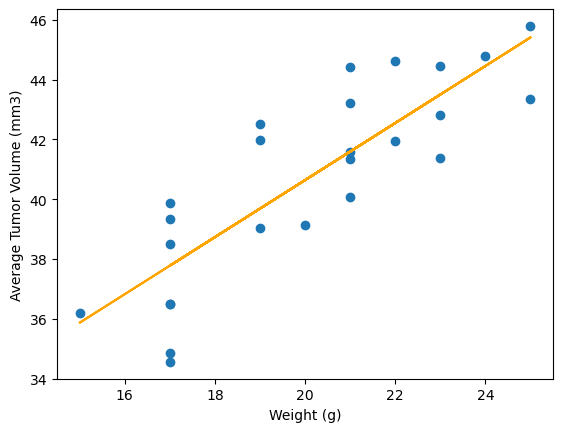

In [83]:
#calculate the correlation coefficient and display
correlation=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],3)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")

#calculate the linear regression model
regression = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

#plot the linear regression model on top of the previous scatter plot
y_values = capomulin_average['Weight (g)']*regression[0]+regression[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="Orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()